In [1]:
pip install qiskit

     |████████████████████████████████| 2.7MB 9.0MB/s 
     |████████████████████████████████| 18.2MB 230kB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 102kB 952kB/s 
     |████████████████████████████████| 983kB 45.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 5.6MB 38.2MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 21.7MB 147kB/s 
     |████████████████████████████████| 573kB 46.9MB/s 
     |████████████████████████████████| 2.3MB 49.5MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.14.0-cp36-none-any.whl size=1400 sha256=30c0938820d3c749da5b3f69c58c4a9c1c7c7c6577e96b903a24a9815f30a2d2
  Stored in directory: /root/.cache/pip/wheels/78/56/d2/194c8ea4c20e67c474027d

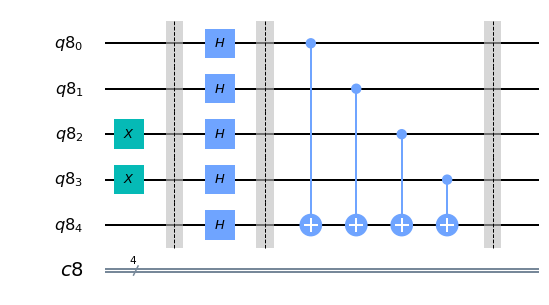

In [32]:
#to find the state for two qbits in one step
from qiskit import QuantumRegister,BasicAer,QuantumCircuit,ClassicalRegister,execute
from qiskit.visualization import plot_bloch_multivector,plot_histogram
import numpy as np

n = 4
oracle  = "b"
if oracle == "b":
  b = 2**n - 1
if oracle == "c":
  c = np.random.randinit(3)

qr = QuantumRegister (n+1)
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)
#barrier == True
qc.x(qr[n-2])
qc.x(qr[n-1])
#qc.x(qr[n])
qc.barrier()

qc.h(qr)
qc.barrier()

if oracle == "c" :
  if c == 1:
    qc.x(qr[n])
  else:
    qc.iden(qr[n])
else: 
  for i in range(n):
    if (b & (1 << i)):
      qc.cx(qr[i],qr[n])

qc.barrier()      
qc.draw(output="mpl")

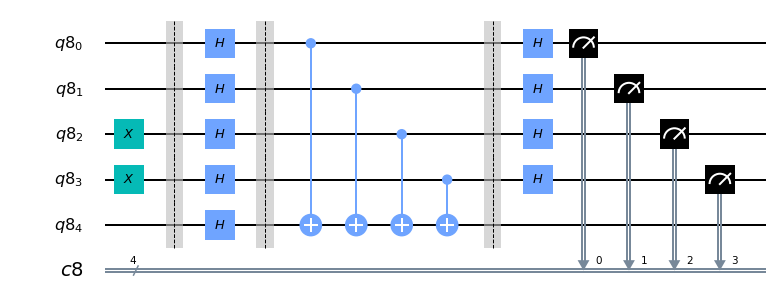

In [33]:
for i in range(n):
  qc.h(qr[i])

for i in range(n):
  qc.measure(qr[i],cr[i])

qc.draw(output="mpl")  

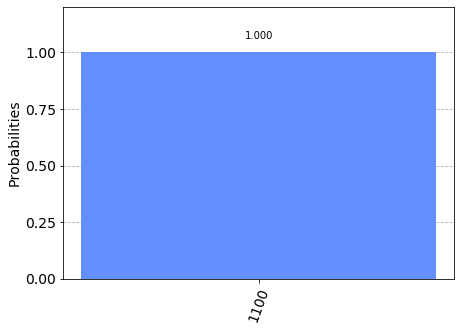

In [34]:

job = execute(qc,BasicAer.get_backend('qasm_simulator'),shots=1000)
result = job.result()
count = result.get_counts()
plot_histogram(count)

In [13]:
b = 8 
n = 4

for i in range(n):
    k = 1 << i
    j = b & k
    print (i , k , j)

0 1 0
1 2 0
2 4 0
3 8 8
